In [2]:
from skimage import io
from skimage.filters import gaussian
from skimage.filters import laplace
from skimage.filters import median
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 1

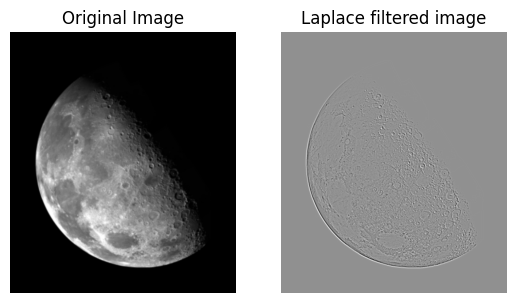

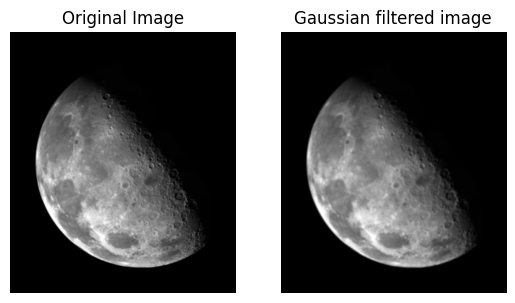

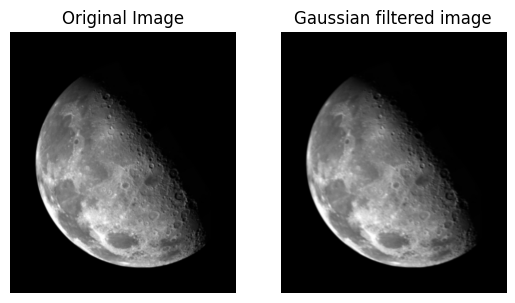

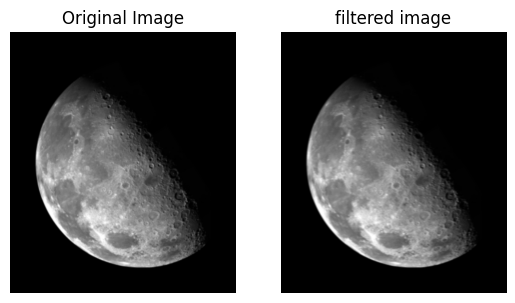

In [ ]:
def filter(image, ker):
    image = image.astype('float64')
    h_image, w_image = image.shape
    h_ker, w_ker = ker.shape
    hf_ker = np.cast['int']((h_ker-1.)/2.)
    wf_ker = np.cast['int']((w_ker-1.)/2.)

    J = np.zeros_like(image)
    for i in np.arange(hf_ker, h_image-hf_ker, 1):
        for j in np.arange(wf_ker, w_image-wf_ker, 1):
            for l in np.arange(-hf_ker, hf_ker+1, 1):
                for m in np.arange(-wf_ker, wf_ker+1, 1):
                    J[i, j] += image[i+l, j+m] * ker[l+hf_ker, m+wf_ker]

    return J

image = io.imread("/content/drive/My Drive/cmput 206/assignment2/moon.png", as_gray=True)
# laplacian
lapker = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])
filtered_image_lap = filter(image, lapker)

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_lap, cmap='gray')
plt.title('Laplace filtered image')
plt.axis('off')
plt.show()
# gaussian
gker = (1/273) * np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
])
filtered_image_gaussian = filter(image, gker)
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered_image_gaussian, cmap='gray')
plt.title("Gaussian filtered image")
plt.axis('off')
plt.show()
# [0,0,0,0,0],[0,1,0,1,0],[0,0,0,1,0]]
kernel3 = np.array([[0, 0, 0, 0, 0],
                [0, 1, 0, 1, 0],
                [0, 0, 0, 1, 0]])
filtered_image_3 = filter(image, kernel3)
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered_image_3, cmap='gray')
plt.title("Gaussian filtered image")
plt.axis('off')
plt.show()
# [0,0,0],[6,0,6],[0,0,0]
kernel4 = np.array([[0, 0, 0],
                   [6, 0, 6],
                   [0, 0, 0]])
filtered_image_4 = filter(image, kernel4)
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered_image_4, cmap='gray')
plt.title("filtered image")
plt.axis('off')
plt.show()

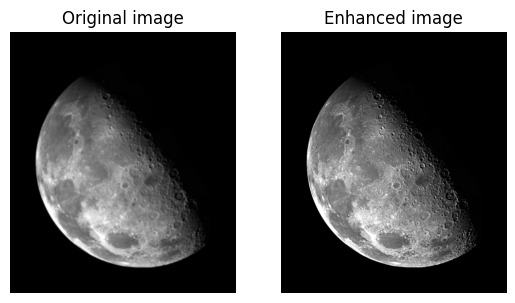

In [ ]:
# 5. Compute image enhancement using a Laplacian filter and display the result. Use your result from 1.
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")
plt.axis('off')

enhanced_image = np.clip(image - filtered_image_lap, 0, 255).astype(np.uint8)

plt.subplot(122)
plt.imshow(enhanced_image, cmap='gray', vmin=0, vmax=255)
plt.title("Enhanced image")
plt.axis('off')
plt.show()

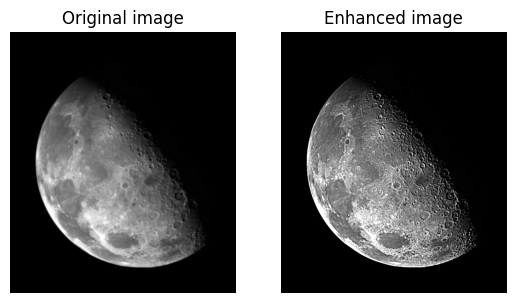

In [ ]:
# 6. Compute image enhancement using the Gaussian filter and the unsharp mask method and display the result. Use your result from 2.
# Unsharp mask formula
k = 6
enhanced_image = np.clip(image + k * (image - filtered_image_gaussian), 0, 255).astype(np.uint8)

# Display the images
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")
plt.axis('off')

plt.subplot(122)
plt.imshow(enhanced_image, cmap='gray', vmin=0, vmax=255)
plt.title("Enhanced image")
plt.axis('off')

plt.show()

# 1-copy

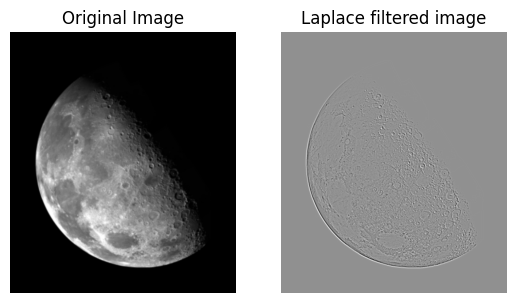

In [ ]:
# 1. Laplacian Filter
image = io.imread("/content/drive/My Drive/cmput 206/assignment2/moon.png",as_gray=True)
kernel = np.array([
[0, 1, 0],
[1, -4, 1],
[0, 1, 0]
])
kernel_size = kernel.shape[0]
pad_size = (kernel_size-1) // 2  # Assuming a square kernel with an odd size
padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
filtered_image = np.zeros_like(image, dtype=float)

for i in range(pad_size, image.shape[0] + pad_size):
    for j in range(pad_size, image.shape[1] + pad_size):
        neighborhood = padded_image[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
        filtered_image[i-pad_size, j-pad_size] = np.sum(neighborhood * kernel)

fig = plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Laplace filtered image')
plt.axis('off')

plt.show()

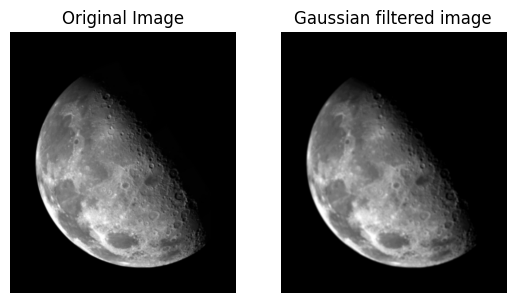

In [ ]:
# 2. Gaussian filter
gker = (1/273) * np.array([
    [1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]
])
image.astype('float64')
h_image,w_image = image.shape
h_ker,w_ker = gker.shape
hf_ker = np.cast['int']((h_ker-1.)/2.)
wf_ker = np.cast['int']((w_ker-1.)/2.)

J = np.zeros_like(image)
for i in np.arange(hf_ker,h_image-hf_ker,1):
    for j in np.arange(wf_ker,w_image-wf_ker,1):
        for l in np.arange(-hf_ker,hf_ker+1,1):
            for m in np.arange(-wf_ker,wf_ker+1,1):
                J[i,j] += image[i+l,j+m]*gker[l+hf_ker,m+wf_ker]

fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(J, cmap='gray')
plt.title("Gaussian filtered image")
plt.axis('off')
plt.show()

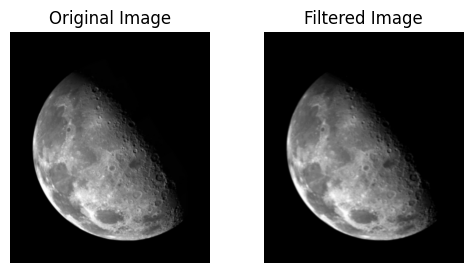

In [ ]:
# 3. [0,0,0,0,0],[0,1,0,1,0],[0,0,0,1,0]]
kernel3 = np.array([[0, 0, 0, 0, 0],
                [0, 1, 0, 1, 0],
                [0, 0, 0, 1, 0]])
image.astype('float64')
h_ker3,w_ker3 = kernel3.shape
hf_ker3 = np.cast['int']((h_ker3-1.)/2.)
wf_ker3 = np.cast['int']((w_ker3-1.)/2.)
kernel3_size = kernel3.shape[0]
pad3_size = (kernel3_size-1) // 2
padded_image = np.pad(image, pad3_size, mode='constant', constant_values=0)
L = np.zeros_like(image)
for i in np.arange(hf_ker3,h_image-hf_ker3,1):
    for j in np.arange(wf_ker3,w_image-wf_ker3,1):
        for l in np.arange(-hf_ker3,hf_ker3+1,1):
            for m in np.arange(-wf_ker3,wf_ker3+1,1):
                L[i,j] += image[i+l,j+m]*gker[l+hf_ker3,m+wf_ker3]
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(L, cmap='gray')
plt.title("Filtered Image")
plt.axis('off')
plt.show()

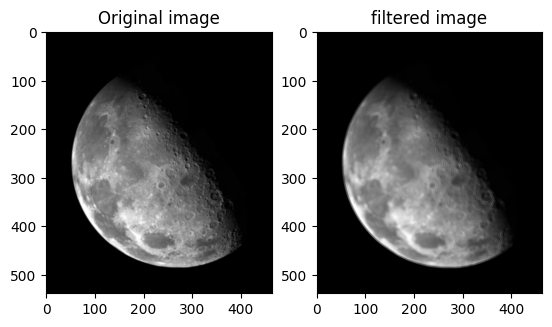

In [ ]:
# 4.[0,0,0],[6,0,6],[0,0,0]
height, width = image.shape
k_height, k_width = kernel.shape

# 创建一个空白图像用于存储卷积结果
result = np.zeros_like(image)

# 进行卷积操作
for i in range(1, height-1):
    for j in range(1, width-1):
        region = image[i-1:i+2, j-1:j+2]
        result[i, j] = np.sum(region * kernel)

kernel = np.array([[0, 0, 0],
                   [6, 0, 6],
                   [0, 0, 0]])
fig = plt.figure()
plt.subplot(121)
plt.imshow((image).astype(int), cmap='gray', vmin=0, vmax=255)
plt.title("Original image")
plt.subplot(122)
plt.imshow((image + filtered_image).astype(int), cmap='gray', vmin=0, vmax=255)
plt.title("filtered image")
plt.show()


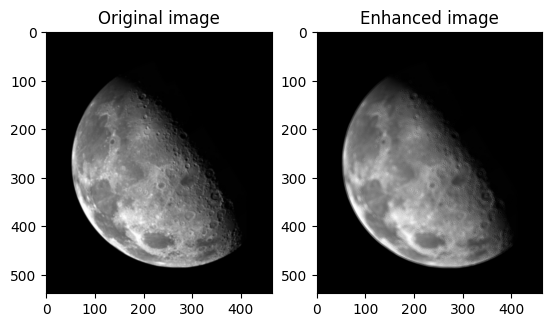

In [ ]:
# 5. Compute image enhancement using a Laplacian filter and display the result. Use your result from 1.
fig = plt.figure()
plt.subplot(121)
plt.imshow((image).astype(int), cmap='gray', vmin=0, vmax=255)
plt.title("Original image")
plt.subplot(122)
plt.imshow((image + filtered_image).astype(int), cmap='gray', vmin=0, vmax=255)
plt.title("Enhanced image")
plt.show()

In [ ]:
# 6.  Compute image enhancement using the Gaussian filter and the unsharp mask method and display the result. Use your result from 2.
fig = plt.figure()
plt.subplot(121)
plt.imshow((image).astype(int), cmap='gray', vmin=0, vmax=255)
plt.title("Original image")
plt.subplot(122)
plt.imshow((image + J).astype(int), cmap='gray', vmin=0, vmax=255)
plt.title("Gaussian Enhanced image")
plt.show()

# 2

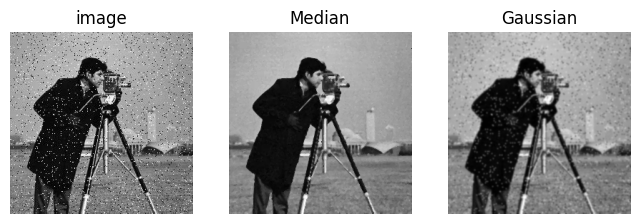

In [ ]:
noisy_image = io.imread("/content/drive/My Drive/cmput 206/assignment2/noisy.jpg")

# Apply median filter to remove salt-and-pepper noise
median_filter_size = 3
median_filtered_image = median(noisy_image)

fig, axes = plt.subplots(1, 3, figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median')
plt.axis('off')

# Apply Gaussian filter to the noisy image
gaussian_filtered_image = gaussian(noisy_image, sigma=1)
plt.subplot(1, 3, 3)
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title('Gaussian')
plt.axis('off')

plt.show()

# 3

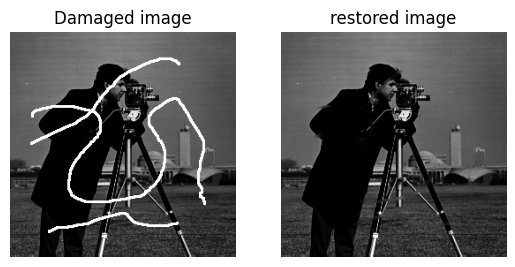

In [ ]:
damaged_image = io.imread('/content/drive/My Drive/cmput 206/assignment2/damage_cameraman.png')
damaged_mask = io.imread('/content/drive/My Drive/cmput 206/assignment2/damage_mask.png', as_gray=True)
repaired_image = damaged_image.copy()

while True:
    # J = I
    repaired_image_prev = repaired_image.copy()

    # Step 2: J = GaussianSmooth(J)
    repaired_image_smoothed = gaussian(repaired_image, sigma=2)

    # Step 3: J(U) = I(U)
    repaired_image = np.where(damaged_mask > 0, repaired_image, repaired_image_smoothed)

    # Check for convergence
    if np.array_equal(repaired_image, repaired_image_prev):
        break

fig = plt.figure()
plt.subplot(121), plt.imshow(damaged_image, cmap='gray'), plt.title('Damaged image'),plt.axis('off')
plt.subplot(122), plt.imshow(repaired_image, cmap='gray'), plt.title('restored image'),plt.axis('off')
plt.show()

# 4

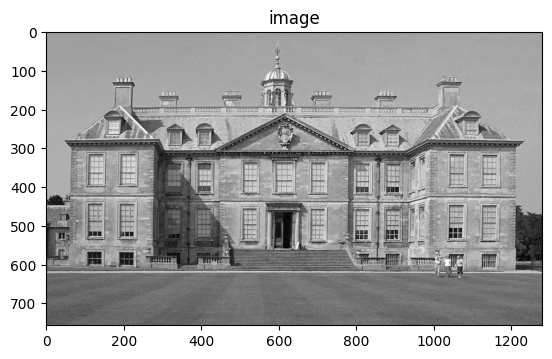

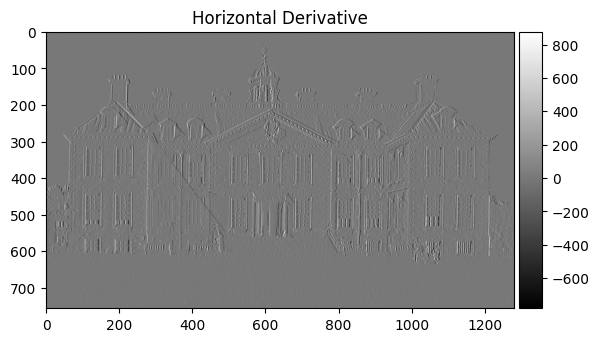

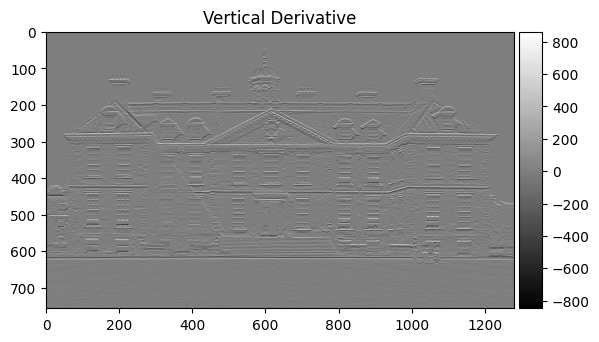

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
I = io.imread("/content/drive/My Drive/cmput 206/assignment2/ex2.jpg")
fig=plt.figure()
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title("image")
plt.show()

sobel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Compute horizontal and vertical derivatives using convolve2d
derivative_horizontal = signal.convolve2d(I, sobel_horizontal, mode='same', boundary='symm')
derivative_vertical = signal.convolve2d(I, sobel_vertical, mode='same', boundary='symm')
fig=plt.figure()
plt.imshow(derivative_horizontal, cmap='gray')
plt.title('Horizontal Derivative')

# Add colorbar to the right
divider1 = make_axes_locatable(plt.gca())
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax1)

fig=plt.figure()
plt.imshow(derivative_vertical, cmap='gray')
plt.title('Vertical Derivative')
# Add colorbar to the right
divider2 = make_axes_locatable(plt.gca())
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax2)

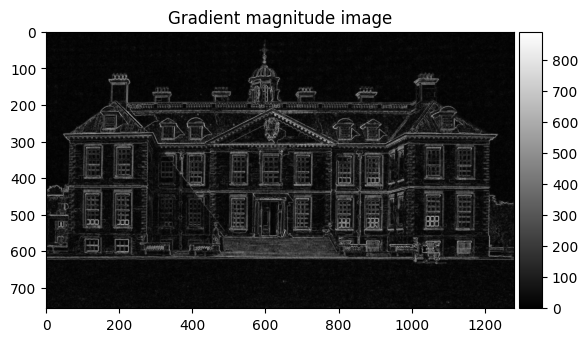

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

Ix = signal.convolve2d(I, sobel_horizontal, mode='same', boundary='symm')
Iy = signal.convolve2d(I, sobel_vertical, mode='same', boundary='symm')
E = np.sqrt(Ix**2 + Iy**2) # Edge strength or Gradient magnitude

fig, ax = plt.subplots()  # Create a figure and axis object

# Plot the image on the axis
im = ax.imshow(E, cmap='gray')
ax.set_title("Gradient magnitude image")

# Add colorbar to the right
divider3 = make_axes_locatable(ax)
cax3 = divider3.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax3)

plt.show()

# 5

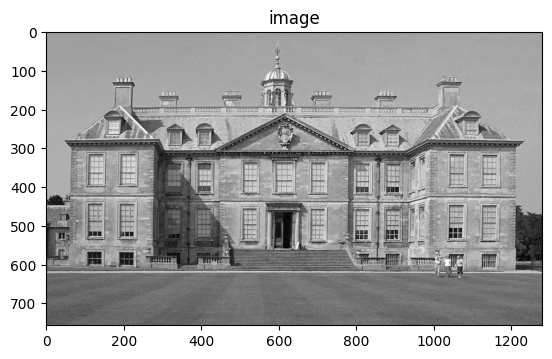

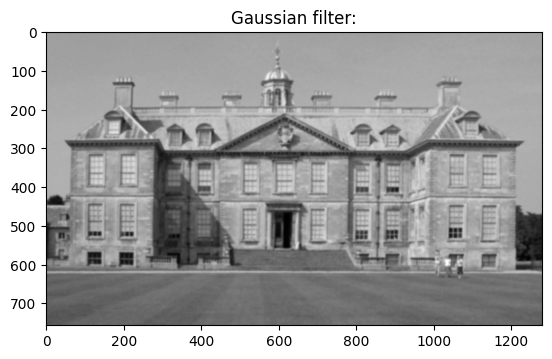

Target image vs My image: Best Generated Image
Cosine Distance: 0.076


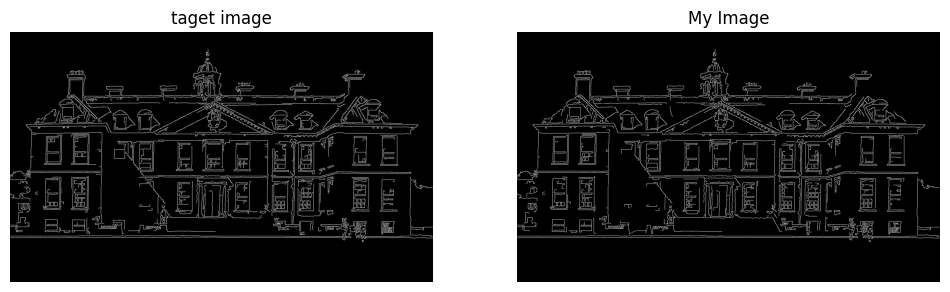

In [3]:
from skimage import feature
from scipy.spatial.distance import cosine
from skimage.util import img_as_float

I = io.imread("/content/drive/My Drive/cmput 206/assignment2/ex2.jpg")
fig=plt.figure()
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title("image")
plt.show()

image = io.imread("/content/drive/My Drive/cmput 206/assignment2/ex2.jpg", as_gray=True)
target_image = io.imread("/content/drive/My Drive/cmput 206/assignment2/canny_target.jpg", as_gray=True)

# Step 2: Initialize best_distance to a large number
best_distance = 1e10
best_params = [0, 0, 0]

blurred_image = gaussian(image, sigma=2)

for low_thresh in [50, 70, 90]:
  for high_thresh in [150, 170, 190]:
      for sigma_val in [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8]:
        canny_output = feature.canny(image, low_threshold=low_thresh, high_threshold=high_thresh, sigma=sigma_val)
        this_dist = cosine(canny_output.flatten(), img_as_float(target_image).flatten(),w = None)

        if (this_dist < best_distance) and (np.sum(canny_output > 0.0) > 0.0):
          best_distance = this_dist
          best_params = [low_thresh, high_thresh, sigma_val]

my_image = feature.canny(image, low_threshold=best_params[0], high_threshold=best_params[1], sigma=best_params[2])

fig=plt.figure()
plt.imshow(blurred_image, cmap='gray')
plt.title("Gaussian filter:")
plt.show()


# Display the original image, target image, and the best generated image
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
ax = axes.ravel()

ax[0].imshow(target_image, cmap=plt.cm.gray)
ax[0].set_title('taget image')

ax[1].imshow(my_image, cmap=plt.cm.gray)
ax[1].set_title('My Image')

print('Target image vs My image: Best Generated Image\nCosine Distance: {:.3f}'.format(best_distance))

for a in ax:
    a.axis('off')

plt.show()